In [1]:
import pandas as pd
import numpy as np
from pyalex import Works
import pyalex
pyalex.config.email = "tarakomarecity@gmail.com"

flatten2 = lambda l: [item for sublist in l if sublist == sublist for item in sublist]

In [2]:
pager = Works().filter(concepts={"id": "C55282118"})\
            .select(["id", "title", "publication_year", "authorships", "referenced_works"]).paginate(per_page=200, n_max=None)

works_json = []
for page in pager:
    for item in page:
        works_json.append(item)
    print(len(works_json))


200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
9600
9800
10000
10200
10400
10600
10800
11000
11200
11400
11600
11800
12000
12200
12400
12600
12800
13000
13200
13400
13600
13800
14000
14200
14400
14600
14800
15000
15200
15400
15600
15800
16000
16200
16400
16600
16800
17000
17200
17400
17600
17800
18000
18200
18400
18600
18800
19000
19200
19400
19600
19800
20000
20113
20113


In [3]:
works_json

[{'id': 'https://openalex.org/W2543580944',
  'title': 'Particle swarm optimization',
  'publication_year': 2007,
  'authorships': [{'author_position': 'first',
    'author': {'id': 'https://openalex.org/A5040001436',
     'display_name': 'Roberto Poli',
     'orcid': 'https://orcid.org/0000-0001-8837-4370'},
    'institutions': [{'id': 'https://openalex.org/I110002522',
      'display_name': 'University of Essex',
      'ror': 'https://ror.org/02nkf1q06',
      'country_code': 'GB',
      'type': 'education',
      'lineage': ['https://openalex.org/I110002522']}],
    'countries': ['GB'],
    'is_corresponding': True,
    'raw_author_name': 'Riccardo Poli',
    'raw_affiliation_string': 'Department of Computing and Electronic Systems, University of Essex, Essex, UK',
    'raw_affiliation_strings': ['Department of Computing and Electronic Systems, University of Essex, Essex, UK']},
   {'author_position': 'middle',
    'author': {'id': 'https://openalex.org/A5031763860',
     'display_n

In [4]:
years = pd.Series(
    {work['id']: work['publication_year'] for work in works_json},
    name='year'
)
years.index.name = 'eid'

citations_data = []
for work in works_json:
    target_id = work['id']
    for referenced_work in work['referenced_works']:
        citations_data.append({'source': referenced_work, 'target': target_id})
citations_df = pd.DataFrame(citations_data)

team_sizes = pd.Series(
    {work['id']: len(work['authorships']) for work in works_json},
    name='team_size'
)
team_sizes.index.name = 'eid'

display(years, citations_df, team_sizes)

eid
https://openalex.org/W2543580944    2007
https://openalex.org/W2037227137    2014
https://openalex.org/W2131374955    2011
https://openalex.org/W2611370172    2000
https://openalex.org/W1980911747    2005
                                    ... 
https://openalex.org/W4298179224    1993
https://openalex.org/W59136458      1993
https://openalex.org/W616620646     1993
https://openalex.org/W633594408     1993
https://openalex.org/W659533566     1993
Name: year, Length: 20112, dtype: int64

source                            target
0        https://openalex.org/W129701583  https://openalex.org/W2543580944
1        https://openalex.org/W132155930  https://openalex.org/W2543580944
2        https://openalex.org/W202510507  https://openalex.org/W2543580944
3       https://openalex.org/W1499946327  https://openalex.org/W2543580944
4       https://openalex.org/W1556765312  https://openalex.org/W2543580944
...                                  ...                               ...
206632  https://openalex.org/W2062937895  https://openalex.org/W1977173302
206633  https://openalex.org/W2089213691  https://openalex.org/W2029812678
206634  https://openalex.org/W2149755721  https://openalex.org/W2029812678
206635  https://openalex.org/W2047020865  https://openalex.org/W2033043833
206636  https://openalex.org/W1995299393  https://openalex.org/W2097754616

[206637 rows x 2 columns]

eid
https://openalex.org/W2543580944    3
https://openalex.org/W2037227137    6
https://openalex.org/W2131374955    2
https://openalex.org/W2611370172    4
https://openalex.org/W1980911747    8
                                   ..
https://openalex.org/W4298179224    0
https://openalex.org/W59136458      2
https://openalex.org/W616620646     2
https://openalex.org/W633594408     5
https://openalex.org/W659533566     1
Name: team_size, Length: 20112, dtype: int64

In [5]:
def citation_groupby(df_citation):
    '''source,targetのDataFrameを引用先，引用元ごとにgroupby
    
    input: source,targetをcolumnにもつedgeのDataFrame

    index: eid
    source: indexが引用先となる論文群(新)
    target: indexが引用元となる論文群(旧)
    '''
    
    citations_source_gp = df_citation.groupby('source').agg(list)
    citations_target_gp = df_citation.groupby('target').agg(list)
    df_citation_gp = pd.concat([citations_source_gp,citations_target_gp],axis = 1)
    return df_citation_gp

citations_gb = citation_groupby(citations_df)
citations_gb

target  \
https://openalex.org/W100101487    [https://openalex.org/W128464440]   
https://openalex.org/W100217747   [https://openalex.org/W2280606228]   
https://openalex.org/W1002236927  [https://openalex.org/W4321748500]   
https://openalex.org/W1002282652  [https://openalex.org/W2208386037]   
https://openalex.org/W100236546   [https://openalex.org/W4295767149]   
...                                                              ...   
https://openalex.org/W975149971                                  NaN   
https://openalex.org/W978889119                                  NaN   
https://openalex.org/W983054012                                  NaN   
https://openalex.org/W98410131                                   NaN   
https://openalex.org/W99074793                                   NaN   

                                                                             source  
https://openalex.org/W100101487                                                 NaN  
https://openalex.org/W100217747                                                 NaN  
https://openalex.org/W1002236927                                                NaN  
https://openalex.org/W1002282652                                                NaN  
https://openalex.org/W100236546                                                 NaN  
...                                                                             ...  
https://openalex.org/W975149971   [https://openalex.org/W143506948, https://open...  
https://openalex.org/W978889119   [https://openalex.org/W1965922082, https://ope...  
https://openalex.org/W983054012   [https://openalex.org/W24658438, https://opena...  
https://openalex.org/W98410131    [https://openalex.org/W45265867, https://opena...  
https://openalex.org/W99074793    [https://openalex.org/W1978120325, https://ope...  

[162911 rows x 2 columns]

In [6]:
def get_score(node):
    try:
        node_r = set(citations_gb.target.loc[node])
        node_r_c = set(flatten2([citations_gb.source.loc[x] for x in node_r])) - set([node])
        node_c = set(citations_gb.source.loc[node])
        allnodes = node_c | node_r_c
        cite_target = node_c - node_r_c
        cite_targetref = node_r_c - node_c
        cite_target_targetref_both = node_r_c & node_c
        score = (len(cite_target)*1 + len(cite_target_targetref_both)*-1 + len(cite_targetref)*0)/len(allnodes)
        return score
    except:
        return None

In [7]:
#eids = citations_gb.index

#from multiprocessing import Pool
#P = Pool(20)
#res = P.map(get_score,eids)
#P.terminate()
#P.close()
#scores = pd.DataFrame([[eid,re] for eid,re in zip(eids,res)])
#display(scores, scores[scores[1].notna()])

#scores.index = scores[0]
#scores['year'] = scores[0].map(years)
#display(scores)

In [8]:
eids = citations_gb.index

res = []
for eid in eids:
    res.append(get_score(eid))
scores = pd.DataFrame([[eid,re] for eid,re in zip(eids,res)])
display(scores, scores[scores[1].notna()])

scores.index = scores[0]
scores['team_size'] = scores[0].map(team_sizes)
display(scores)

0   1
0        https://openalex.org/W100101487 NaN
1        https://openalex.org/W100217747 NaN
2       https://openalex.org/W1002236927 NaN
3       https://openalex.org/W1002282652 NaN
4        https://openalex.org/W100236546 NaN
...                                  ...  ..
162906   https://openalex.org/W975149971 NaN
162907   https://openalex.org/W978889119 NaN
162908   https://openalex.org/W983054012 NaN
162909    https://openalex.org/W98410131 NaN
162910    https://openalex.org/W99074793 NaN

[162911 rows x 2 columns]

0         1
27       https://openalex.org/W101217238  0.000000
465     https://openalex.org/W1231826530  0.179487
528     https://openalex.org/W1258575267  0.000000
537     https://openalex.org/W1261750724  0.413793
689      https://openalex.org/W137525769  0.337838
...                                  ...       ...
153640   https://openalex.org/W613507116  0.732143
153940   https://openalex.org/W654895263  0.115385
154102    https://openalex.org/W74849283  0.439024
154281   https://openalex.org/W832199480 -0.500000
154339   https://openalex.org/W853961372  0.475000

[1703 rows x 2 columns]

0   1  \
0                                                                        
https://openalex.org/W100101487    https://openalex.org/W100101487 NaN   
https://openalex.org/W100217747    https://openalex.org/W100217747 NaN   
https://openalex.org/W1002236927  https://openalex.org/W1002236927 NaN   
https://openalex.org/W1002282652  https://openalex.org/W1002282652 NaN   
https://openalex.org/W100236546    https://openalex.org/W100236546 NaN   
...                                                            ...  ..   
https://openalex.org/W975149971    https://openalex.org/W975149971 NaN   
https://openalex.org/W978889119    https://openalex.org/W978889119 NaN   
https://openalex.org/W983054012    https://openalex.org/W983054012 NaN   
https://openalex.org/W98410131      https://openalex.org/W98410131 NaN   
https://openalex.org/W99074793      https://openalex.org/W99074793 NaN   

                                  team_size  
0                                            
https://openalex.org/W100101487         NaN  
https://openalex.org/W100217747         NaN  
https://openalex.org/W1002236927        NaN  
https://openalex.org/W1002282652        NaN  
https://openalex.org/W100236546         NaN  
...                                     ...  
https://openalex.org/W975149971         5.0  
https://openalex.org/W978889119         5.0  
https://openalex.org/W983054012         1.0  
https://openalex.org/W98410131          2.0  
https://openalex.org/W99074793          3.0  

[162911 rows x 3 columns]

In [9]:
scores_notna = scores[scores[1].notna() & scores['team_size'].notna()].drop(columns=0)
scores_notna

1  team_size
0                                                    
https://openalex.org/W101217238   0.000000        9.0
https://openalex.org/W1231826530  0.179487        3.0
https://openalex.org/W1258575267  0.000000        3.0
https://openalex.org/W1261750724  0.413793        5.0
https://openalex.org/W137525769   0.337838        3.0
...                                    ...        ...
https://openalex.org/W613507116   0.732143        1.0
https://openalex.org/W654895263   0.115385        1.0
https://openalex.org/W74849283    0.439024        6.0
https://openalex.org/W832199480  -0.500000        1.0
https://openalex.org/W853961372   0.475000        5.0

[1703 rows x 2 columns]

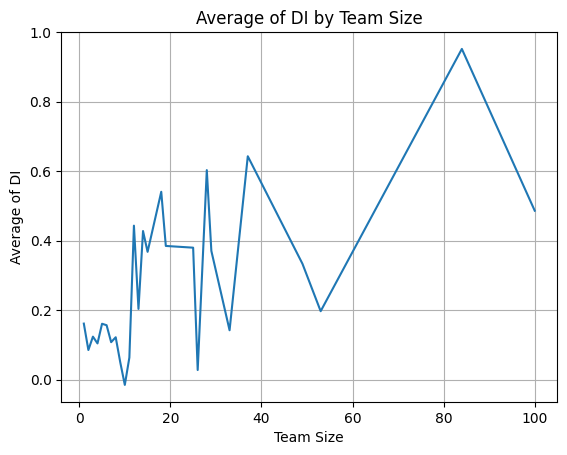

In [10]:
import matplotlib.pyplot as plt

# team_sizeごとにグループ化
grouped_df = scores_notna.groupby('team_size').mean()

# グラフの描画
plt.plot(grouped_df.index, grouped_df[1])
plt.xlabel('Team Size')
plt.ylabel('Average of DI')
plt.title('Average of DI by Team Size')
plt.grid(True)
plt.show()